In [36]:
!shred -u setup_colab.py
!wget -q "https://github.com/jpcano1/python_utils/raw/main/setup_colab_general.py" -O setup_colab_general.py
!wget -q "https://raw.githubusercontent.com/jpcano1/python_utils/main/MINE_4101/setup_colab.py" -O setup_colab.py
import setup_colab as setup
setup.setup_lab5()


General Functions Enabled Successfully


In [37]:
!pip install -q https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

## **Bienvenido a la quinta práctica de Jupyter Notebook**
- **Laboratorio desarrollado por Carlos Andrés Salazar Aroca y Juan Pablo Cano**

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/jpcano1/MINE-4101-tareas/blob/master/lab_5.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png"/>Run in Google Colab</a>
  </td>
</table>

## **Enunciado**
1. ¿Qué significado tiene el intercepto? ¿Tiene sentido ser analizado para este problema? **El intercepto es el promedio esperado de la variable dependiente cuando todas las variables independientes son iguales a cero.**
2. ¿Qué significado tienen los coeficientes que acompañan a las variables categóricas? (i.e smoker_no, smoker_yes) **Los coeficientes en la variable "Smoker" determinan la manera como el modelo está influenciado por esta variable. Si el coeficiente es positivo, determinará que la variable objetivo está positivamente determinada por el hecho de que la variable smoker sea positiva**
3. Realice la estimación de la variable respuesta pero solo con las variables numéricas. ¿Cuál modelo utilizaría para predecir la prima del seguro? ¿Por qué?
4. Entregar las preguntas del anterior numeral.
5. Con los datos utilizados en la práctica 6 (regresión ridge y Lasso), determine cuál es el mejor valor de alpha para el modelo de regresión ridge y lasso, para tal fin, divida la data en entrenamiento y validación (puede ser 80% para entrenamiento y 20% para validación), estime distintos modelos de regresión (ridge y lasso) utilizando la data de entrenamiento y distintos valores de alpha, luego, aplique los modelos estimados sobre la data de entrenamiento y validación, construya un gráfico (ver figura 1), donde en el eje x, se encuentra los distintos valores de alpha y en el eje y se encuentra una medida de error (puede utilizar una de las medidas de error que se encuentran en el laboratorio 6). A partir de este gráfico, determine el mejor valor de alpha.
![image](https://docs.google.com/uc?export=download&id=1HH2Z7IzXbxmkSRERkkcBuPKVh5CT4jUo)

In [38]:
from utils import general as gen

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use("ggplot")
import seaborn as sns

import pandas_profiling

In [39]:
wine_data = pd.read_csv("data/winequality.csv")
insurance_data = pd.read_csv("data/insurance.csv")

In [40]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [41]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [42]:
encoder = LabelEncoder()
encoder.fit(insurance_data["sex"].drop_duplicates())
insurance_data["sex"] = encoder.transform(insurance_data["sex"])

In [43]:
encoder.fit(insurance_data["smoker"].drop_duplicates())
insurance_data["smoker"] = encoder.transform(insurance_data["smoker"])

In [44]:
encoder.fit(insurance_data["region"].drop_duplicates())
insurance_data["region"] = encoder.transform(insurance_data["region"])

In [45]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [46]:
pandas_profiling.ProfileReport(insurance_data)

- Aquí nos encontramos con un incoveniente, y es que cuando vemos que la variable **charges** esta muy correlacionada con la variable **smoker** es difícil saber si podríamos utilizar solamente variables numéricas para estimar la variable objetivo. Sin embargo, podríamos intentar una regresión lineal con la edad.

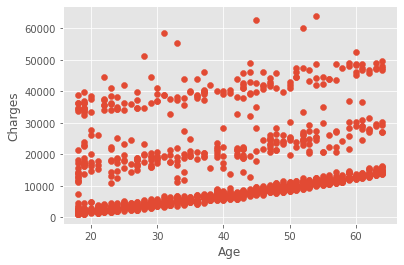

In [47]:
plt.scatter(insurance_data["age"], insurance_data["charges"])
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()

In [48]:
train_data, valid_data = train_test_split(insurance_data, test_size=0.2, random_state=1234)

In [49]:
lin_reg = LinearRegression(n_jobs=-1)

In [50]:
lin_reg.fit(train_data["age"].values.reshape(-1, 1), train_data["charges"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [51]:
y_pred = lin_reg.predict(valid_data["age"].values.reshape(-1, 1))

In [52]:
r2_score(valid_data["charges"], y_pred)

0.14110056982312047

In [53]:
mean_squared_error(valid_data["charges"], y_pred)

123697796.22093345

In [54]:
mean_absolute_error(valid_data["charges"], y_pred)

8862.008873568635

- Como podemos ver, tanto el error medio como el error absoluto fue bastante alto. Por lo que no podemos estimar la variable objetivo utilizando la edad en un modelo de regresión lineal.
- Viendo la gráfica de BMI se podría pensar que se puede intentar ajustar un modelo no lineal para el comportamiento de estos datos. Sin embargo, vamos a intentar con un modelo lineal a ver qué sucede.

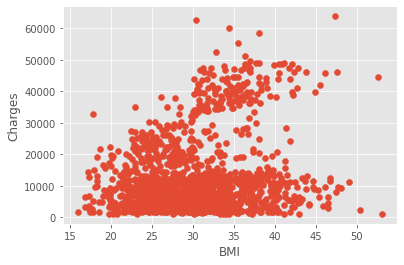

In [55]:
plt.scatter(insurance_data["bmi"], insurance_data["charges"])
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.show()

In [56]:
lin_reg = LinearRegression(n_jobs=-1)

In [57]:
lin_reg.fit(train_data["bmi"].values.reshape(-1, 1), train_data["charges"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [58]:
y_pred = lin_reg.predict(valid_data["bmi"].values.reshape(-1, 1))

In [59]:
r2_score(valid_data["charges"], y_pred)

0.042202559450623234

In [60]:
mean_squared_error(valid_data["charges"], y_pred)

137940984.07727376

In [61]:
mean_absolute_error(valid_data["charges"], y_pred)

9169.067116522137

- Al ver los anteriores resultados, de la misma forma como es difícil estimar la prima con la edad, de igual forma es difícil estimar la prima con el bmi usando una regresión lineal.

Ahora vamos a intentar con un modelo que cuente con ambas variables.

In [62]:
lin_reg = LinearRegression(n_jobs=-1)

In [63]:
lin_reg.fit(train_data[["age","bmi"]], train_data["charges"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [64]:
y_pred = lin_reg.predict(valid_data[["age","bmi"]])

In [65]:
r2_score(valid_data["charges"], y_pred)

0.1649951585615942

In [66]:
mean_squared_error(valid_data["charges"], y_pred)

120256522.58084497

In [67]:
mean_absolute_error(valid_data["charges"], y_pred)

8712.112805252793

Como podemos ver el modelo mejora pero muy poco con respecto a usar solo una de las variables numéricas.

## **Ridge & Lasso**

In [68]:
from sklearn.linear_model import Ridge,Lasso

def computeMetrics(alphas,train_data,valid_data,metric='r2'):
  ridge_train = []
  ridge_val = []
  lasso_train = []
  lasso_val = []
  for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_data.drop("charges",axis = 1), train_data["charges"])
    y_pred_ridge_train = ridge.predict(train_data.drop("charges",axis = 1))
    y_pred_ridge_val = ridge.predict(valid_data.drop("charges",axis = 1))

    lasso = Lasso(alpha=alpha)
    lasso.fit(train_data.drop("charges",axis = 1), train_data["charges"])
    y_pred_lasso_train = lasso.predict(train_data.drop("charges",axis = 1))
    y_pred_lasso_val = lasso.predict(valid_data.drop("charges",axis = 1))


    if metric == 'r2':
      ridge_val.append(r2_score(valid_data["charges"], y_pred_ridge_val))
      lasso_val.append(r2_score(valid_data["charges"], y_pred_lasso_val))
      ridge_train.append(r2_score(train_data["charges"], y_pred_ridge_train))
      lasso_train.append(r2_score(train_data["charges"], y_pred_lasso_train))

    elif metric == 'mae':
      ridge_val.append(mean_absolute_error(valid_data["charges"], y_pred_ridge_val))
      lasso_val.append(mean_absolute_error(valid_data["charges"], y_pred_lasso_val))
      ridge_train.append(mean_absolute_error(train_data["charges"], y_pred_ridge_train))
      lasso_train.append(mean_absolute_error(train_data["charges"], y_pred_lasso_train))

    else:
      ridge_val.append(mean_squared_error(valid_data["charges"], y_pred_ridge_val))
      lasso_val.append(mean_squared_error(valid_data["charges"], y_pred_lasso_val))
      ridge_train.append(mean_squared_error(train_data["charges"], y_pred_ridge_train))
      lasso_train.append(mean_squared_error(train_data["charges"], y_pred_lasso_train))

  return ridge_train,ridge_val,lasso_train,lasso_val
alphas = np.logspace(-4,2,50)
metric = "r2"
ridges_train,ridges_val,lassos_train,lassos_val = computeMetrics(alphas,train_data,valid_data,metric)

### **Ridge**

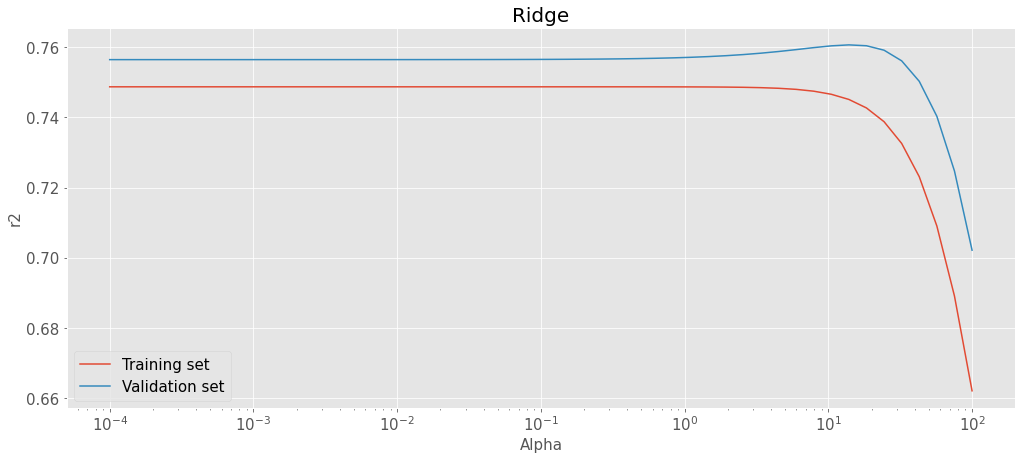

In [69]:
plt.figure(figsize=(17,7))
plt.plot(alphas,ridges_train, label="Training set")
plt.plot(alphas,ridges_val, label="Validation set")
ax = plt.gca()
ax.set_title("Ridge",fontsize=20)
ax.set_xscale('log')
ax.set_xlabel("Alpha", fontsize=15)
ax.set_ylabel(metric, fontsize=15)
ax.tick_params(labelsize=15)
ax.legend(fontsize=15)
plt.show()

En la gráfica puede observarse que con el método de regularización Ridge el conjunto de validación presenta un desempeño ligeramente mejor que el de entrenamiento. Sin embargo, con valores cercanos a 100 este desempeño decae drásticamente, también se puede observar que el valor ideal para alpha es 10.

### **Lasso**

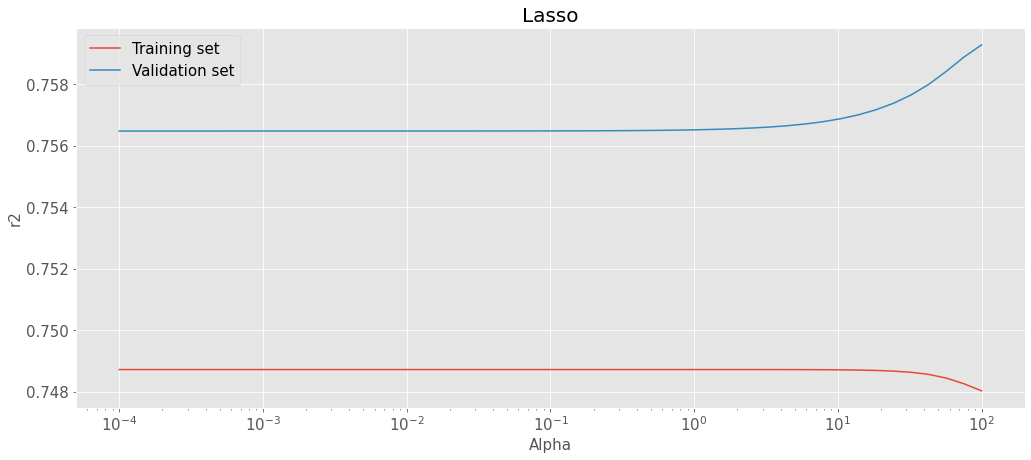

In [70]:
plt.figure(figsize=(17,7))
plt.plot(alphas,lassos_train, label="Training set")
plt.plot(alphas,lassos_val, label="Validation set")
ax = plt.gca()
ax.set_title("Lasso",fontsize=20)
ax.set_xscale('log')
ax.set_xlabel("Alpha", fontsize=15)
ax.set_ylabel(metric, fontsize=15)
ax.tick_params(labelsize=15)
ax.legend(fontsize=15)
plt.show()

En la gráfica puede observarse que con el método de regularización Lasso el conjunto de validación presenta un desempeño ligeramente mejor que el de entrenamiento. Sin embargo, con valores cercanos a 100 este desempeño decae para el conjunto de entrenamiento pero aumenta para el conjunto de validación, también se puede observar que el valor ideal para alpha es 10.